In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
createdDF = pd.read_csv('createdDF.csv')
createdDF.sort_values(by=['DATE_TIME'], inplace=True)
createdDF = createdDF.reset_index()
createdDF.drop(columns=['index'], inplace=True)
createdDF.head()

,DATE_TIME,SOURCE_KEY,DAILY_Y1,TOTAL_Y1,AM_TEMP1,IRRADIA1,DAILY_Y2,TOTAL_Y2,AM_TEMP2,IRRADIA2,DAILY_Y3,TOTAL_Y3,AM_TEMP3,IRRADIA3,AC_POWER
0,2020-05-18 00:00:00,1IF53ai7Xc0U56Y,0.0,6196594.0,24.170166,0.0,0.0,6190002.0,24.060741,0.0,0.0,6183645.0,25.184316,0.0,0.0
1,2020-05-18 00:00:00,3PZuoBAID5Wc2HD,0.0,7000689.0,24.170166,0.0,0.0,6994033.0,24.060741,0.0,0.0,6987759.0,25.184316,0.0,0.0
2,2020-05-18 00:00:00,1BY6WEcLGh8j5v7,0.0,6271605.0,24.170166,0.0,5754.0,6265313.0,24.060741,0.0,0.0,6259559.0,25.184316,0.0,0.0
3,2020-05-18 00:00:00,zVJPv84UY57bAof,0.0,7128535.0,24.170166,0.0,5965.0,7122116.0,24.060741,0.0,0.0,7116151.0,25.184316,0.0,0.0
4,2020-05-18 00:00:00,zBIq5rxdHJRwDNY,0.0,6352150.0,24.170166,0.0,6396.0,6345776.0,24.060741,0.0,0.0,6339380.0,25.184316,0.0,0.0


In [3]:
createdDF.describe()

,DAILY_Y1,TOTAL_Y1,AM_TEMP1,IRRADIA1,DAILY_Y2,TOTAL_Y2,AM_TEMP2,IRRADIA2,DAILY_Y3,TOTAL_Y3,AM_TEMP3,IRRADIA3,AC_POWER
count,65472.000000,6.547200e+04,65472.000000,65472.000000,65472.000000,6.547200e+04,65472.000000,65472.000000,65472.000000,6.547200e+04,65472.000000,65472.000000,65472.000000
mean,3474.906591,6.979008e+06,25.455866,0.229514,3488.454730,6.971734e+06,25.508828,0.229740,3467.504702,6.964513e+06,25.588475,0.229494,303.257213
std,3245.370258,4.138959e+05,3.322836,0.303942,3247.590660,4.137991e+05,3.368267,0.304100,3244.514314,4.133110e+05,3.428428,0.303801,398.385345
min,0.000000,6.196594e+06,20.398505,0.000000,0.000000,6.190002e+06,20.398505,0.000000,0.000000,6.183645e+06,20.398505,0.000000,0.000000
25%,0.000000,6.512002e+06,22.642461,0.000000,0.000000,6.505086e+06,22.624709,0.000000,0.000000,6.499210e+06,22.659219,0.000000,0.000000
50%,3039.928572,7.147274e+06,24.478149,0.021553,3064.517857,7.139828e+06,24.531459,0.021553,2998.937500,7.132547e+06,24.675722,0.021553,25.453571
75%,6594.000000,7.267837e+06,27.865960,0.450518,6606.790625,7.260165e+06,27.934485,0.453390,6542.000000,7.251637e+06,28.020599,0.453390,614.203571
max,9163.000000,7.840965e+06,35.252486,1.221652,9163.000000,7.834799e+06,35.252486,1.221652,9163.000000,7.828158e+06,35.252486,1.221652,1410.950000


In [4]:
encoder = LabelEncoder()
createdDF['SOURCE_KEY'] = encoder.fit_transform(createdDF['SOURCE_KEY'])

##### بررسی بین متغیرهای پیشبین و هدف

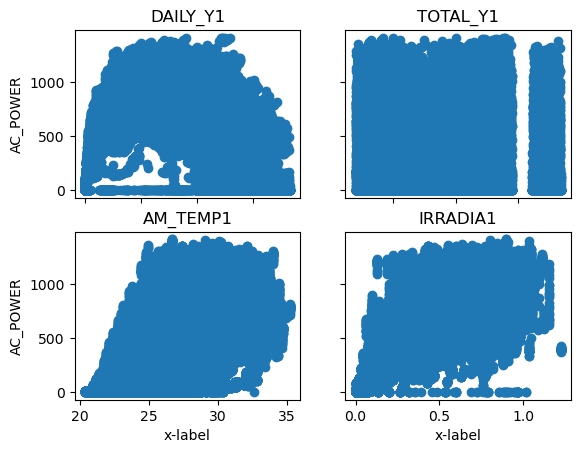

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(createdDF['DAILY_Y1'], createdDF['AC_POWER'])
axs[0, 0].set_title('DAILY_Y1')
axs[0, 1].scatter(createdDF['TOTAL_Y1'], createdDF['AC_POWER'])
axs[0, 1].set_title('TOTAL_Y1')
axs[1, 0].scatter(createdDF['AM_TEMP1'], createdDF['AC_POWER'])
axs[1, 0].set_title('AM_TEMP1')
axs[1, 1].scatter(createdDF['IRRADIA1'], createdDF['AC_POWER'])
axs[1, 1].set_title('IRRADIA1')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='AC_POWER')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

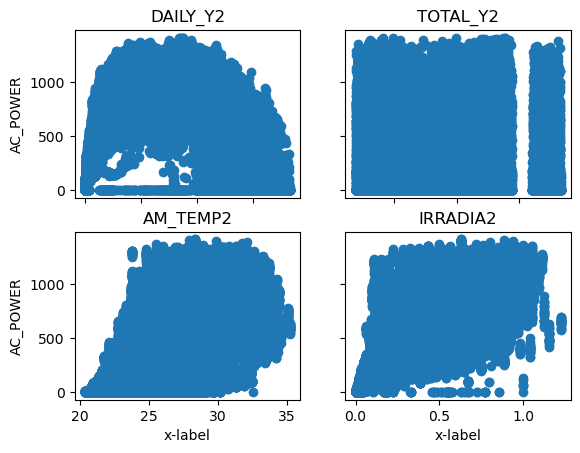

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(createdDF['DAILY_Y2'], createdDF['AC_POWER'])
axs[0, 0].set_title('DAILY_Y2')
axs[0, 1].scatter(createdDF['TOTAL_Y2'], createdDF['AC_POWER'])
axs[0, 1].set_title('TOTAL_Y2')
axs[1, 0].scatter(createdDF['AM_TEMP2'], createdDF['AC_POWER'])
axs[1, 0].set_title('AM_TEMP2')
axs[1, 1].scatter(createdDF['IRRADIA2'], createdDF['AC_POWER'])
axs[1, 1].set_title('IRRADIA2')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='AC_POWER')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

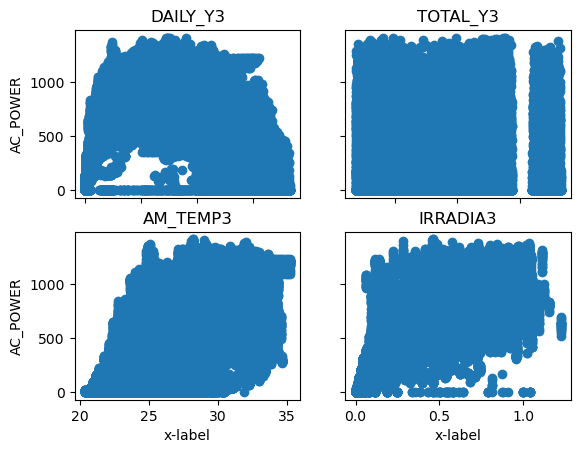

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(createdDF['DAILY_Y3'], createdDF['AC_POWER'])
axs[0, 0].set_title('DAILY_Y3')
axs[0, 1].scatter(createdDF['TOTAL_Y3'], createdDF['AC_POWER'])
axs[0, 1].set_title('TOTAL_Y3')
axs[1, 0].scatter(createdDF['AM_TEMP3'], createdDF['AC_POWER'])
axs[1, 0].set_title('AM_TEMP3')
axs[1, 1].scatter(createdDF['IRRADIA3'], createdDF['AC_POWER'])
axs[1, 1].set_title('IRRADIA3')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='AC_POWER')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


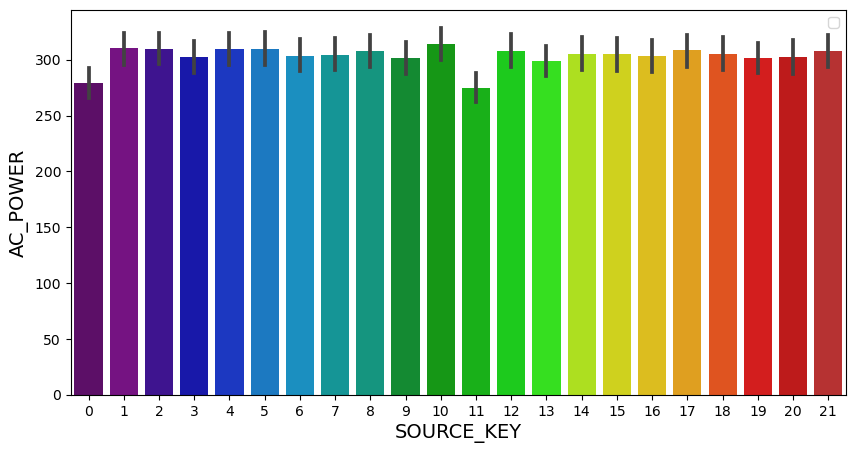

In [8]:
plt.figure(figsize=(10,5))
sns.barplot('SOURCE_KEY' ,'AC_POWER', data=createdDF ,palette='nipy_spectral')
plt.xlabel('SOURCE_KEY', fontsize=14)
plt.ylabel('AC_POWER', fontsize=14)
plt.legend()
plt.show()

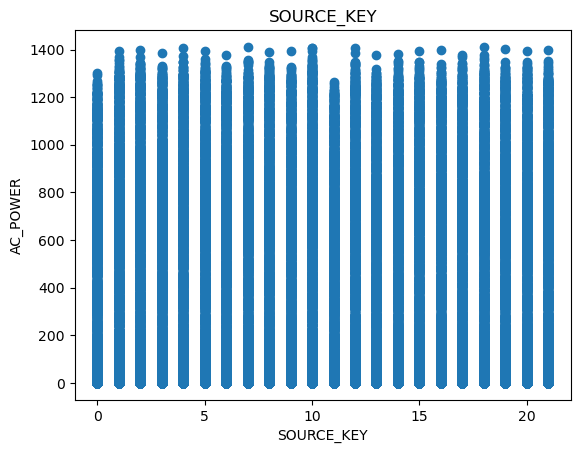

In [9]:
plt.scatter(createdDF['SOURCE_KEY'], createdDF['AC_POWER'])
plt.title('SOURCE_KEY')
plt.xlabel('SOURCE_KEY')
plt.ylabel('AC_POWER')
plt.show()

##### بررسی روابط بین متغیرها

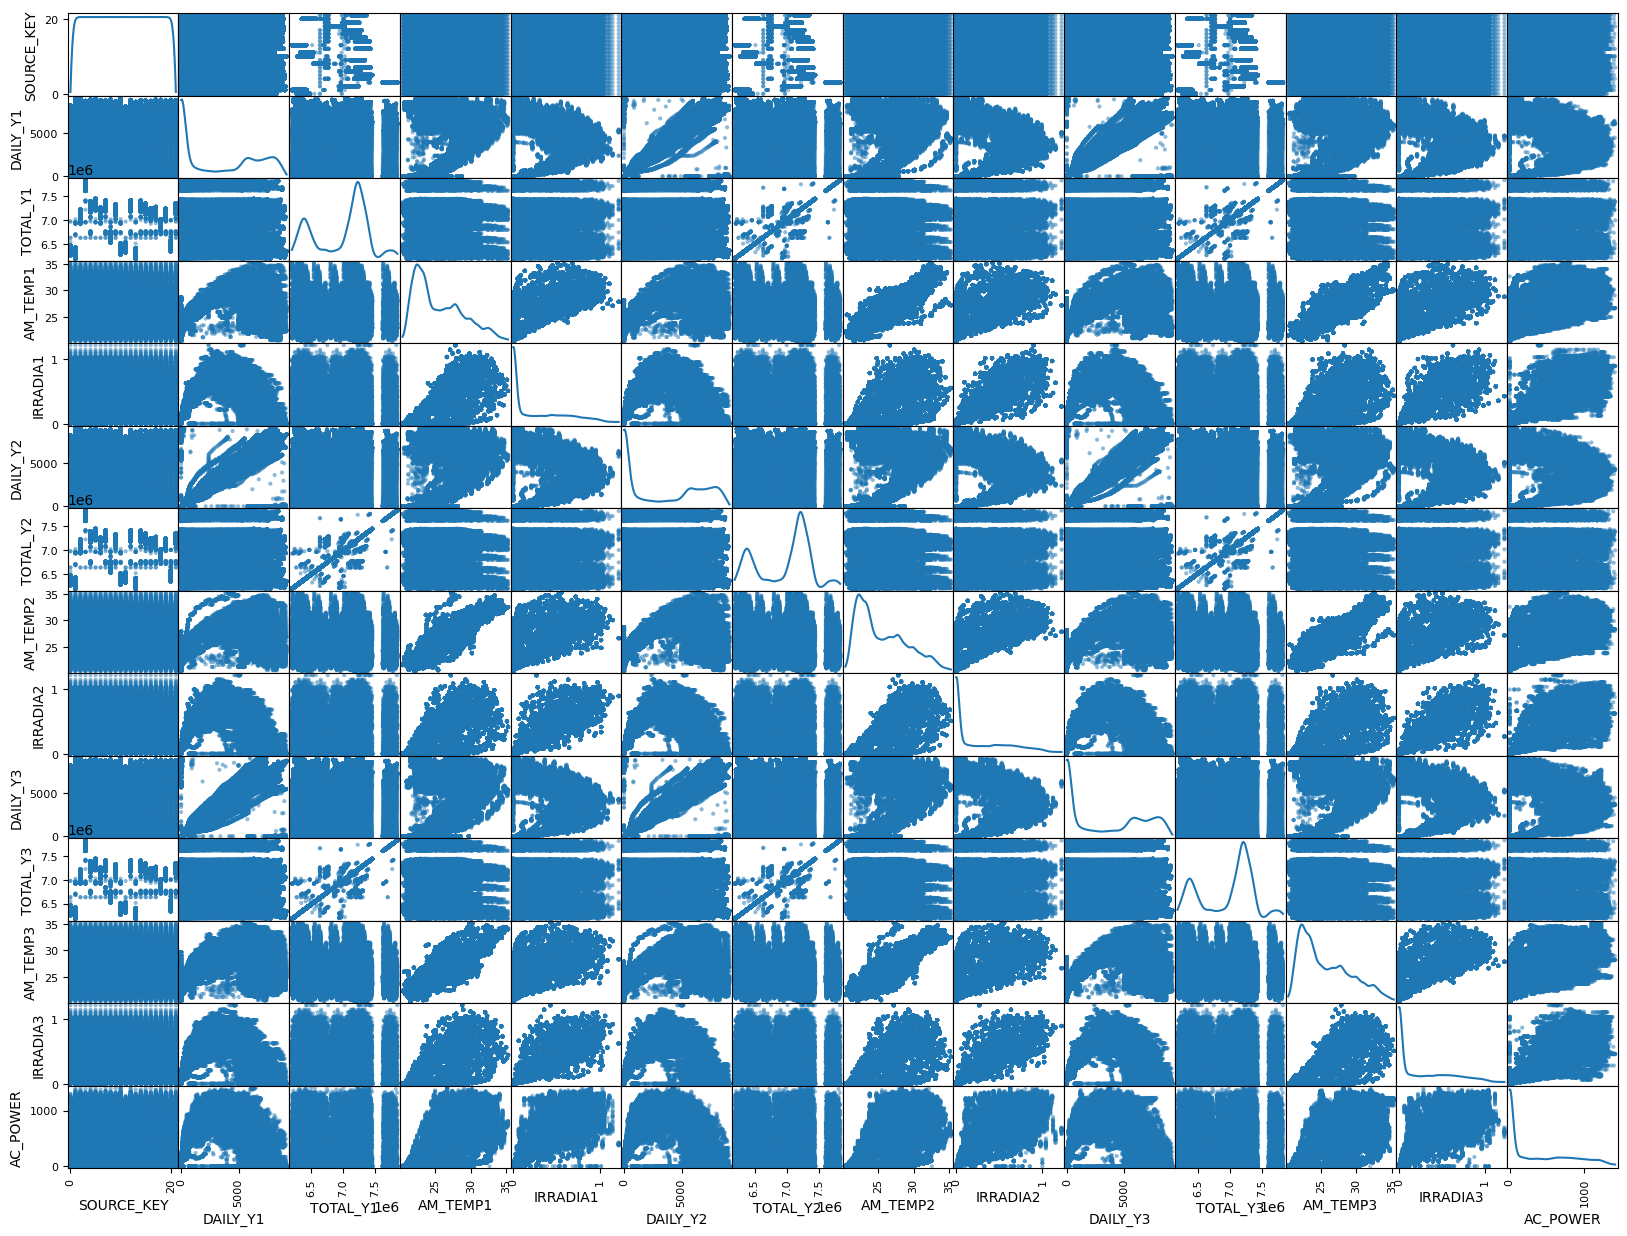

In [10]:
pd.plotting.scatter_matrix(createdDF, diagonal="kde",figsize=(20,15))
plt.show()

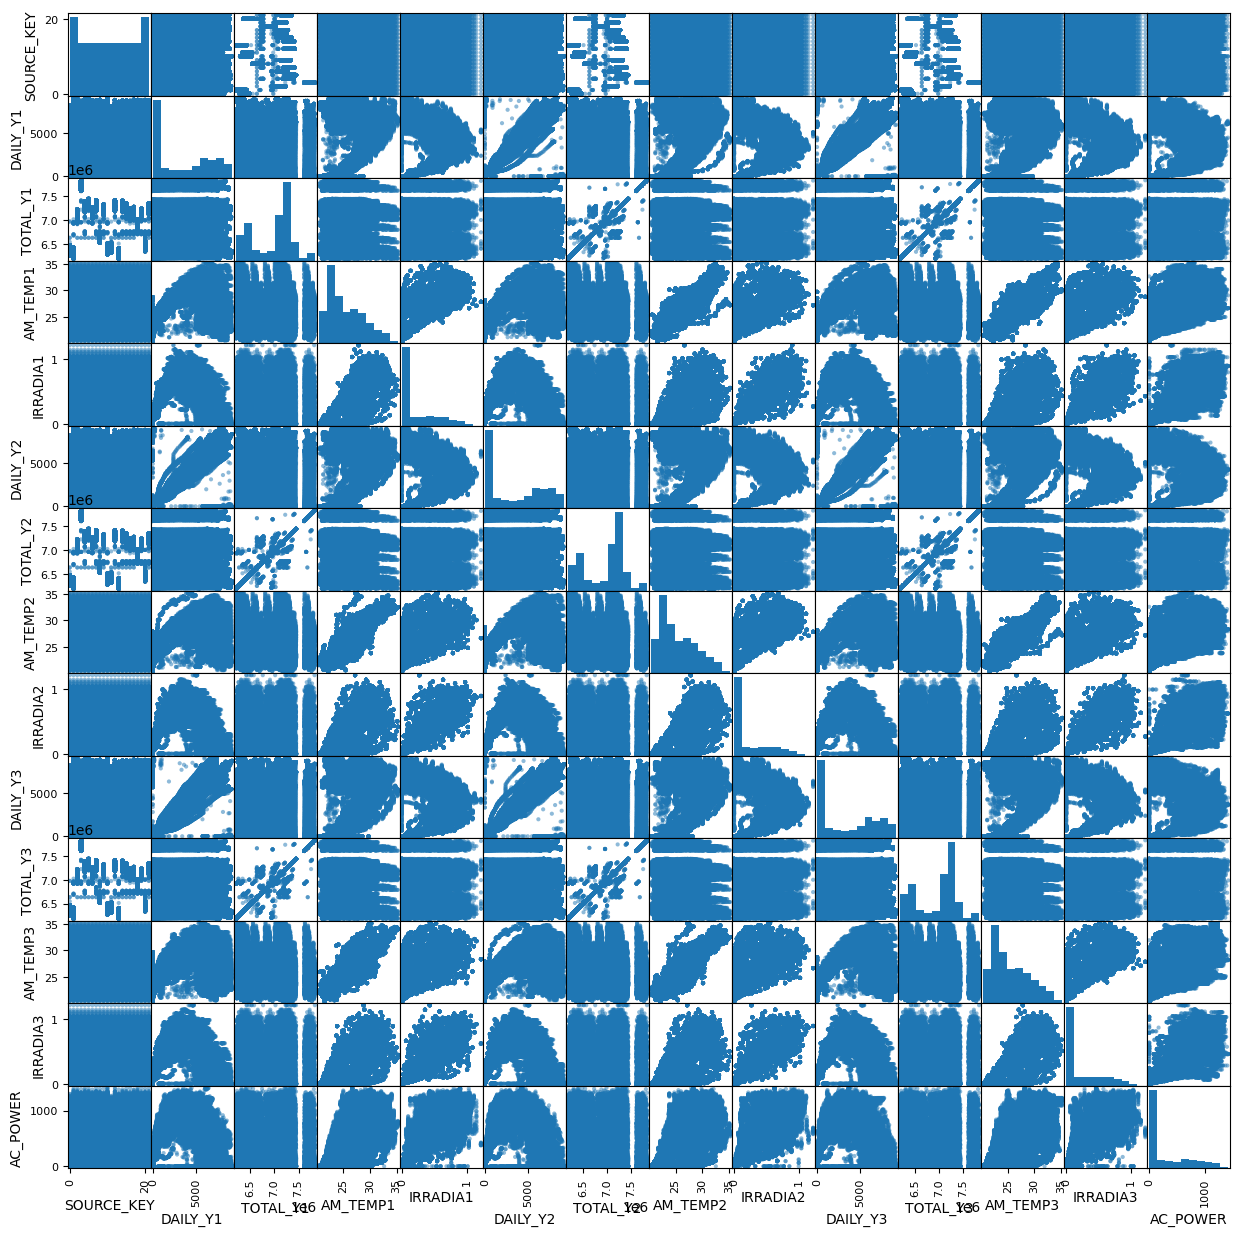

In [11]:
pd.plotting.scatter_matrix(createdDF, figsize=(15,15))
plt.show()

<AxesSubplot:>

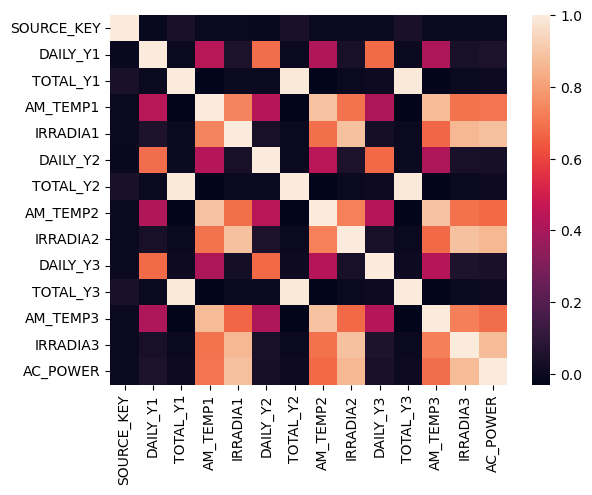

In [12]:
sns.heatmap(createdDF.corr() ,cmap='rocket')

##### بررسی توزیع داده های هر ستون

<AxesSubplot:xlabel='TOTAL_Y1', ylabel='Count'>

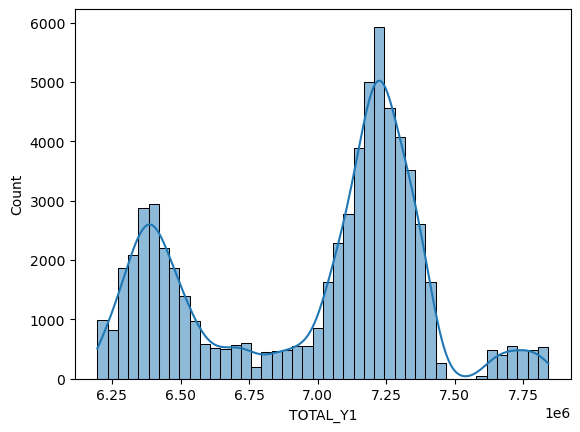

In [13]:
sns.histplot(createdDF['TOTAL_Y1'], kde=True)

<AxesSubplot:xlabel='TOTAL_Y2', ylabel='Count'>

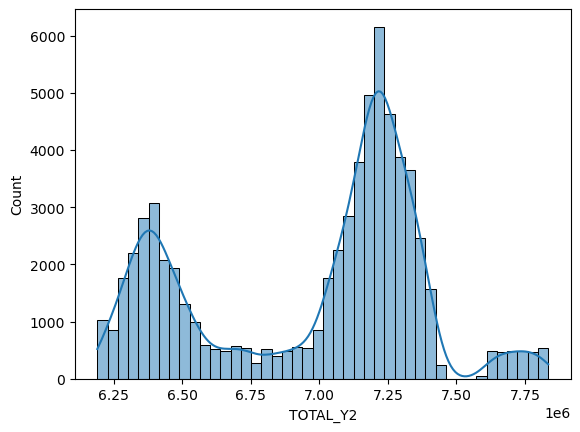

In [14]:
sns.histplot(createdDF['TOTAL_Y2'], kde=True)

<AxesSubplot:xlabel='TOTAL_Y3', ylabel='Count'>

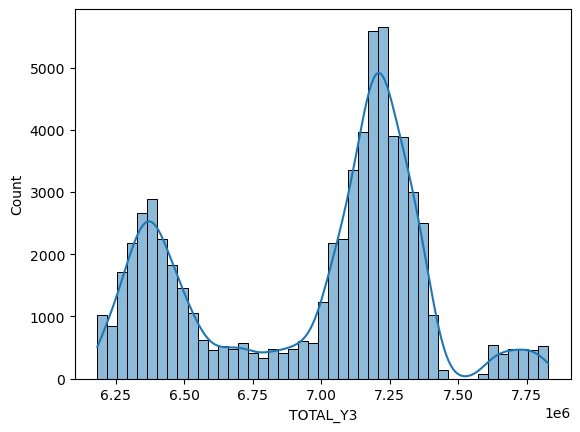

In [15]:
sns.histplot(createdDF['TOTAL_Y3'], kde=True)

<AxesSubplot:xlabel='DAILY_Y1', ylabel='Count'>

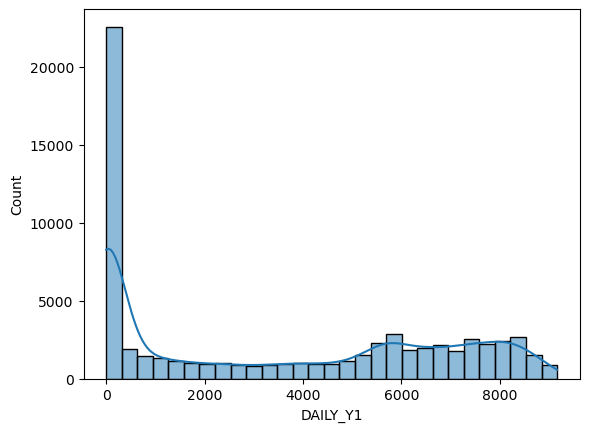

In [16]:
sns.histplot(createdDF['DAILY_Y1'], kde=True)

<AxesSubplot:xlabel='DAILY_Y2', ylabel='Count'>

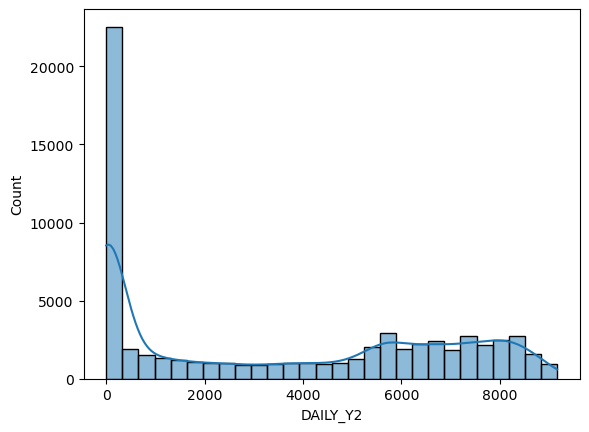

In [17]:
sns.histplot(createdDF['DAILY_Y2'], kde=True)

<AxesSubplot:xlabel='DAILY_Y3', ylabel='Count'>

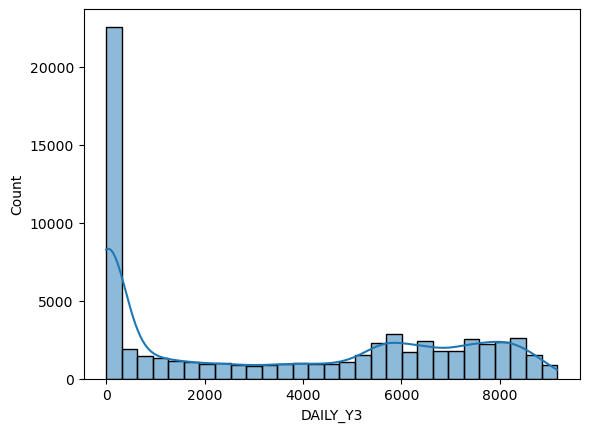

In [18]:
sns.histplot(createdDF['DAILY_Y3'], kde=True)

<AxesSubplot:xlabel='AM_TEMP1', ylabel='Count'>

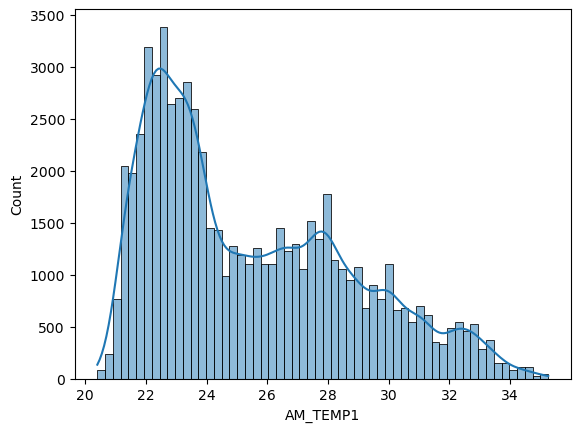

In [19]:
sns.histplot(createdDF['AM_TEMP1'], kde=True)

<AxesSubplot:xlabel='AM_TEMP2', ylabel='Count'>

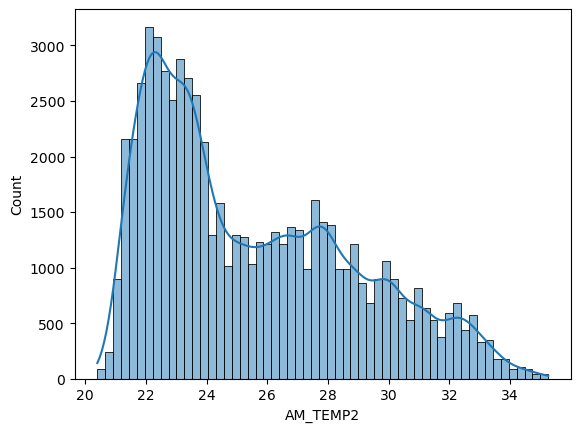

In [20]:
sns.histplot(createdDF['AM_TEMP2'], kde=True)

<AxesSubplot:xlabel='AM_TEMP3', ylabel='Count'>

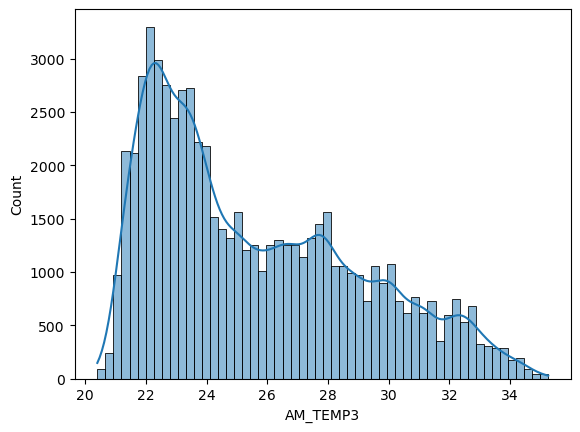

In [21]:
sns.histplot(createdDF['AM_TEMP3'], kde=True)

<AxesSubplot:xlabel='IRRADIA1', ylabel='Count'>

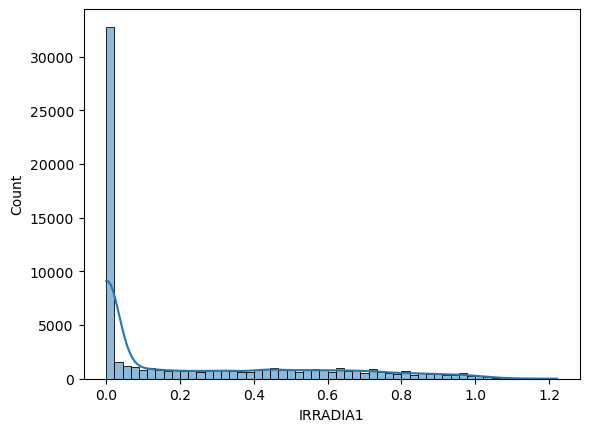

In [22]:
sns.histplot(createdDF['IRRADIA1'], kde=True)

<AxesSubplot:xlabel='IRRADIA2', ylabel='Count'>

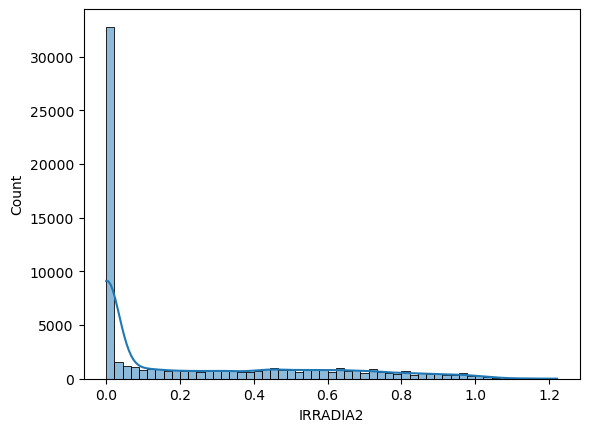

In [23]:
sns.histplot(createdDF['IRRADIA2'], kde=True)

<AxesSubplot:xlabel='IRRADIA3', ylabel='Count'>

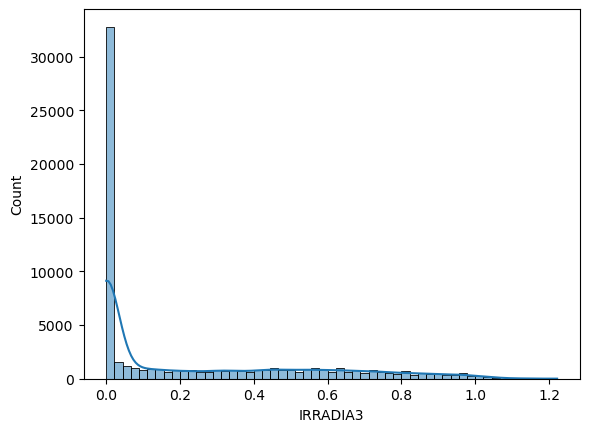

In [24]:
sns.histplot(createdDF['IRRADIA3'], kde=True)

In [25]:
#all = pd.crosstab(createdDF['IRRADIA3'],createdDF['AC_POWER'],margins=True)['All']
#pd.crosstab(card_approval_data.Gender,card_approval_data.Approved).divide(all,axis=0).dropna()

In [26]:
#delete DATE_TIME, AC_POWER, TOTAL_Y1,TOTAL_Y2,TOTAL_Y3 and add mean of 3

# EDA

In [27]:
tempDF = createdDF.copy()
tempDF['MEAN_TOTAL_Y'] = (tempDF['TOTAL_Y1'] + tempDF['TOTAL_Y2']+ tempDF['TOTAL_Y3'])/3

In [28]:
X = createdDF.drop(['DATE_TIME', 'AC_POWER', 'TOTAL_Y2', 'TOTAL_Y3'], axis=1)
X2 = tempDF.drop(['DATE_TIME', 'AC_POWER','TOTAL_Y1', 'TOTAL_Y2', 'TOTAL_Y3'], axis=1)
y = createdDF['AC_POWER']

In [29]:
# Split the dataset into training, testing, and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Split the dataset into training, testing, and validation data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test, y2_test, test_size=0.5, random_state=42)

In [30]:
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

# Fit and transform the training data using standard scaler
X_train_std = scaler_std.fit_transform(X_train)
# Transform the test and validation data using standard scaler fitted on training data
X_test_std = scaler_std.transform(X_test)
X_val_std = scaler_std.transform(X_val)


# Fit and transform the training data using minmax scaler
X_train_minmax = scaler_minmax.fit_transform(X_train)
# Transform the test and validation data using minmax scaler fitted on training data
X_test_minmax = scaler_minmax.transform(X_test)
X_val_minmax = scaler_minmax.transform(X_val)

In [31]:
rfr = RandomForestRegressor()

# Train and validate the classifier without scaled data
rfr.fit(X_train,y_train)

# Evaluate the model on the validation set
y_val_pred = rfr.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)

# Evaluate the model on the test set
y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

score_train = rfr.score(X_train, y_train)
score_val = rfr.score(X_val, y_val)
score_test = rfr.score(X_test, y_test)


# Train and validate the classifier with standard-scaled data
rfr.fit(X_train_std,y_train)

# Evaluate the model on the standardized validation set
y_val_pred_std = rfr.predict(X_val_std)
val_mse_std = mean_squared_error(y_val, y_val_pred_std)

# Evaluate the model on the standardized test set
y_test_pred_std = rfr.predict(X_test_std)
test_mse_std = mean_squared_error(y_test, y_test_pred_std)

score_std_train = rfr.score(X_train_std, y_train)
score_std_val = rfr.score(X_val_std, y_val)
score_std_test = rfr.score(X_test_std, y_test)

# Train and validate the classifier with minmax-scaled data
rfr.fit(X_train_minmax, y_train)
y_predict_minmax = rfr.predict(X_test_minmax)

# Evaluate the model on the minmax validation set
y_val_pred_minmax = rfr.predict(X_val_minmax)
val_mse_minmax = mean_squared_error(y_val, y_val_pred_minmax)

# Evaluate the model on the minmax test set
y_test_pred_minmax = rfr.predict(X_test_minmax)
test_mse_minmax = mean_squared_error(y_test, y_test_pred_minmax)

score_minmax_train = rfr.score(X_train_minmax, y_train)
score_minmax_val = rfr.score(X_val_minmax, y_val)
score_minmax_test = rfr.score(X_test_minmax, y_test)

In [35]:
print(f'Validation MSE: {val_mse:.4f}')
print("r2_score Validation: {:.2f}".format(r2_score(y_val, y_val_pred)))

print(f'Training Accuracy: {score_train:.3f}')
print(f'Validation Accuracy: {score_val:.3f}\n')

print(f'StandardScaler Validation MSE: {val_mse_std:.4f}')
print("StandardScaler r2_score Validation: {:.2f}".format(r2_score(y_val, y_val_pred_std)))

print(f'StandardScaler Training Accuracy: {score_std_train:.3f}')
print(f'StandardScaler Validation Accuracy: {score_std_val:.3f}\n')

print(f'MinMaxScaler Validation MSE: {val_mse_minmax:.4f}')
print("MinMaxScaler r2_score Validation: {:.2f}".format(r2_score(y_val, y_val_pred_minmax)))

print(f'MinMaxScaler Training Accuracy: {score_minmax_train:.3f}')
print(f'MinMaxScaler Validation Accuracy: {score_minmax_val:.3f}\n')

Validation MSE: 2221.5986
r2_score Validation: 0.99
Training Accuracy: 0.998
Validation Accuracy: 0.986

StandardScaler Validation MSE: 2238.6894
StandardScaler r2_score Validation: 0.99
StandardScaler Training Accuracy: 0.998
StandardScaler Validation Accuracy: 0.986

MinMaxScaler Validation MSE: 2160.7444
MinMaxScaler r2_score Validation: 0.99
MinMaxScaler Training Accuracy: 0.998
MinMaxScaler Validation Accuracy: 0.986



In [39]:
# Fit and transform the training data using minmax scaler
X2_train_minmax = scaler_minmax.fit_transform(X2_train)
# Transform the test and validation data using minmax scaler fitted on training data
X2_test_minmax = scaler_minmax.transform(X2_test)
X2_val_minmax = scaler_minmax.transform(X2_val)



# Train and validate the classifier with minmax-scaled data
rfr.fit(X2_train_minmax, y2_train)
y2_predict_minmax = rfr.predict(X2_test_minmax)

# Evaluate the model on the minmax validation set
y2_val_pred_minmax = rfr.predict(X2_val_minmax)
val2_mse_minmax = mean_squared_error(y2_val, y2_val_pred_minmax)

# Evaluate the model on the minmax test set
y2_test_pred_minmax = rfr.predict(X2_test_minmax)
test2_mse_minmax = mean_squared_error(y2_test, y2_test_pred_minmax)

score2_minmax_train = rfr.score(X2_train_minmax, y2_train)
score2_minmax_val = rfr.score(X2_val_minmax, y2_val)
score2_minmax_test = rfr.score(X2_test_minmax, y2_test)

In [40]:
print(f'Mean of Total_Yeild Validation MSE: {val2_mse_minmax:.4f}')
print("Mean of Total_Yeild r2_score Validation: {:.2f}".format(r2_score(y2_val, y2_val_pred_minmax)))

print(f'Mean of Total_Yeild Training Accuracy: {score2_minmax_train:.3f}')
print(f'Mean of Total_Yeild Validation Accuracy: {score2_minmax_val:.3f}\n')


print(f'Yesterday Total_Yeild Validation MSE: {val_mse_minmax:.4f}')
print("Yesterday Total_Yeild r2_score Validation: {:.2f}".format(r2_score(y_val, y_val_pred_minmax)))

print(f'Yesterday Total_Yeild Training Accuracy: {score_minmax_train:.3f}')
print(f'Yesterday Total_Yeild Validation Accuracy: {score_minmax_val:.3f}\n')


Mean of Total_Yeild Validation MSE: 2137.5345
Mean of Total_Yeild r2_score Validation: 0.99
Mean of Total_Yeild Training Accuracy: 0.998
Mean of Total_Yeild Validation Accuracy: 0.986

Yesterday Total_Yeild Validation MSE: 2160.7444
Yesterday Total_Yeild r2_score Validation: 0.99
Yesterday Total_Yeild Training Accuracy: 0.998
Yesterday Total_Yeild Validation Accuracy: 0.986



# Setup

In [41]:
# Split the dataset into training, testing, and validation data
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Fit and transform the training data using minmax scaler
X_train = scaler_minmax.fit_transform(X_train)
# Transform the test and validation data using minmax scaler fitted on training data
X_test = scaler_minmax.transform(X_test)
X_val = scaler_minmax.transform(X_val)


##### baseline model

In [42]:
def learn_model(model):
#     if(model_type == 'LinearRegression'):
#         model = LinearRegression()
#     elif(model_type == 'DecisionTreeRegressor'):
#         model = DecisionTreeRegressor()
#     elif(model_type == 'RandomForestRegressor'):
#         model = RandomForestRegressor()
#     else:
#         return
    model.fit(X_train, y_train)
    # Evaluate the model on validation set
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_score_train = r2_score(y_train, y_train_pred)
    score_train = model.score(X_train, y_train)
    print(f"MSE Training is {mse_train:.4f}")
    print(f"MAE Training is {mae_train:.4f}")
    print(f"r2_score Training: {r2_score_train:.2f}")
    print(f"Score Training is {score_train*100:.4f} %\n")
    
    # Evaluate the model on validation set
    y_val_pred = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_pred)    
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_score_val = r2_score(y_val, y_val_pred)
    score_val = model.score(X_val, y_val)
    print(f"MSE Validation is {mse_val:.4f}")
    print(f"MAE Validation is {mae_val:.4f}")
    print(f"r2_score Validation: {r2_score_val:.2f}")
    print(f"Score validation is {score_val*100:.4f} %")
    
    
    
    # Evaluate the model on test set
#     y_test_pred = model.predict(X_test)
#     test_mse = mean_squared_error(y_test, y_test_pred)
#     score_test = model.score(X_test, y_test)
#     print(f"Test MSE is {test_mse:.4f}")
#     print(f"Score test is {score_test*100:.4f} %")
#     print("r2_score Test: {:.2f}\n".format(r2_score(y_test, y_test_pred)))

In [43]:
def KFold_cross_validation(model,n_splits=3):
    # Initialize KFold object
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    # Initialize arrays to store results
    train_scores = np.zeros(n_splits)
    val_scores = np.zeros(n_splits)

    # Loop over each fold
    for i, (train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_val = X2.to_numpy()[train_index], X2.to_numpy()[val_index]
        y_train, y_val = y.to_numpy()[train_index], y.to_numpy()[val_index]
    
        # Fit and transform the training data using minmax scaler
        X_train = scaler_minmax.fit_transform(X_train)    
        X_val = scaler_minmax.transform(X_val)
                      
        model.fit(X_train,y_train)
        # Calculate training accuracy
        train_pred = model.predict(X_train)
        train_score = mean_squared_error(y_train, train_pred)
        train_scores[i] = train_score
    
        # Calculate validation accuracy
        val_pred = model.predict(X_val)
        val_score = mean_squared_error(y_val, val_pred)
        val_scores[i] = val_score
        # Print results
        print(f"Fold {i+1}: Training MSE = {train_score:.2f}, Validation MSE = {val_score:.2f}")

    # Compute and print average scores across all folds
    print(f"\nAverage Training MSE = {np.mean(train_scores):.2f}, Average Validation MSE = {np.mean(val_scores):.2f}")

In [44]:
dummy_regr = DummyRegressor(strategy="mean", quantile=0.5, constant=500)
learn_model(dummy_regr)

MSE Training is 159019.0208
MAE Training is 345.2382
r2_score Training: 0.00
Score Training is 0.0000 %

MSE Validation is 154890.0923
MAE Validation is 341.8530
r2_score Validation: -0.00
Score validation is -0.0201 %


In [45]:
lr_model = LinearRegression()
learn_model(lr_model)

MSE Training is 26977.7008
MAE Training is 95.6362
r2_score Training: 0.83
Score Training is 83.0349 %

MSE Validation is 26942.6367
MAE Validation is 95.2451
r2_score Validation: 0.83
Score validation is 82.6018 %


In [46]:
kfold_lr_model = LinearRegression()
KFold_cross_validation(kfold_lr_model,3)

Fold 1: Training MSE = 26946.22, Validation MSE = 26645.43
Fold 2: Training MSE = 26986.03, Validation MSE = 26578.84
Fold 3: Training MSE = 26582.03, Validation MSE = 27376.85

Average Training MSE = 26838.09, Average Validation MSE = 26867.04


In [47]:
dtr_model = DecisionTreeRegressor()
learn_model(dtr_model)

MSE Training is 0.0000
MAE Training is 0.0000
r2_score Training: 1.00
Score Training is 100.0000 %

MSE Validation is 3731.8864
MAE Validation is 18.2443
r2_score Validation: 0.98
Score validation is 97.5901 %


In [48]:
kfold_dtr_model = DecisionTreeRegressor()
KFold_cross_validation(kfold_dtr_model,3)

Fold 1: Training MSE = 0.00, Validation MSE = 3569.38
Fold 2: Training MSE = 0.00, Validation MSE = 3732.57
Fold 3: Training MSE = 0.00, Validation MSE = 3586.57

Average Training MSE = 0.00, Average Validation MSE = 3629.51


In [49]:
rfc_model = RandomForestRegressor()
learn_model(rfc_model)

MSE Training is 265.8253
MAE Training is 5.3508
r2_score Training: 1.00
Score Training is 99.8328 %

MSE Validation is 2190.5360
MAE Validation is 14.8233
r2_score Validation: 0.99
Score validation is 98.5855 %


In [50]:
kfold_rfc_model = RandomForestRegressor()
KFold_cross_validation(kfold_rfc_model,3)

Fold 1: Training MSE = 270.85, Validation MSE = 2016.00
Fold 2: Training MSE = 271.22, Validation MSE = 1988.60
Fold 3: Training MSE = 268.24, Validation MSE = 1989.43

Average Training MSE = 270.10, Average Validation MSE = 1998.01


In [51]:
parameters = {
    "splitter":["best","random"],
    "max_depth" : [1,10, 20, 40],
    "min_samples_split": [2, 5, 10, 20, 30],
    "min_samples_leaf":[1,4,7,10],
    ##"criterion": ["squared_error", "absolute_error"],
    ##"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    ##"max_features":["auto","log2","sqrt",None],
    ##"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
}


tuning_model = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters)#, scoring='neg_mean_squared_error', cv=3,verbose=3)

In [52]:
tuning_model.fit(X_train, y_train)
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [53]:
#{'max_depth': 60,
# 'min_samples_leaf': 6,
# 'min_samples_split': 3,
# 'splitter': 'best'}

best_param = tuning_model.best_params_
best_model = DecisionTreeRegressor(
    ##criterion = best_param['criterion'],
    splitter = best_param['splitter'],
    max_depth = best_param['max_depth'],
    min_samples_split = best_param['min_samples_split'],
    min_samples_leaf = best_param['min_samples_leaf'],
    ##min_weight_fraction_leaf = best_param['min_weight_fraction_leaf'],
    ##max_features = best_param['max_features'],
    ##max_leaf_nodes = best_param['max_leaf_nodes']
)

learn_model(best_model)

MSE Training is 1547.6488
MAE Training is 12.3891
r2_score Training: 0.99
Score Training is 99.0268 %

MSE Validation is 3420.4978
MAE Validation is 18.4363
r2_score Validation: 0.98
Score validation is 97.7912 %


In [60]:
parameters_Forest = {
    #"n_estimators":[50, 100],
    #"criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth" : [10, 30, 60],
    #"min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1,5,10],
}


tuning_model2 = GridSearchCV(RandomForestRegressor(), param_grid=parameters_Forest)

In [61]:
tuning_model2.fit(X_train, y_train)
tuning_model2.best_params_

{'max_depth': 60, 'min_samples_leaf': 1}

In [62]:
best_param2 = tuning_model2.best_params_
best_model2 = RandomForestRegressor(
    #n_estimators = best_param2['n_estimators'],
    #criterion = best_param2['criterion'],
    max_depth = best_param2['max_depth'],
    #min_samples_split = best_param2['min_samples_split'],
    #min_samples_leaf = best_param2['min_samples_leaf'],
)

learn_model(best_model2)

MSE Training is 262.8657
MAE Training is 5.3855
r2_score Training: 1.00
Score Training is 99.8347 %

MSE Validation is 2201.4388
MAE Validation is 14.8419
r2_score Validation: 0.99
Score validation is 98.5784 %


### best model on test

In [65]:
y_pred_test = rfc_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)    
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)
score_test = rfc_model.score(X_test, y_test)
print(f"MSE Test is {mse_test:.4f}")
print(f"MAE Test is {mae_test:.4f}")
print(f"r2_score Test: {r2_score_test:.2f}")
print(f"Score Test is {score_test*100:.4f} %")

MSE Test is 1656.7831
MAE Test is 14.0781
r2_score Test: 0.99
Score Test is 98.9712 %
